In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
import scipy.stats as stats
import seaborn as sns

In [14]:
rcParams['pdf.fonttype']=42
rcParams['font.family']='sans-serif'
rcParams['font.size']=7

In [4]:
def qnorm_dataframe( data ):
	"""
	quantile normalize a dataframe with numeric values only!
	"""
	rank_mean = data.stack().groupby(data.rank(method='first').stack().astype(int)).mean()
	qnormed_data    = data.rank(method='min').stack().astype(int).map(rank_mean).unstack()
	return qnormed_data

In [5]:
feats = pd.read_table('./Data/features-bool-deDuped-2918feats-808cells.txt', index_col=0)
feats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 808 entries, ACH-001172 to ACH-002510
Columns: 2918 entries, plasma_cell to CDH_VIM_lo
dtypes: bool(2918)
memory usage: 2.3+ MB


In [6]:
bf = pd.read_table('./Data/table_Avana2020Q4_CRISPRcleanR_corrected_all', index_col=0)
bf = bf.T
bf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 808 entries, ACH-001172 to ACH-002510
Columns: 18111 entries, A1BG to ZZZ3
dtypes: float64(18111)
memory usage: 111.7+ MB


In [7]:
qbf = qnorm_dataframe( bf.T ).T


In [8]:
data = feats.join(qbf, how='inner')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 808 entries, ACH-001172 to ACH-002510
Columns: 21013 entries, plasma_cell to ZZZ3
dtypes: bool(2918), float64(18095)
memory usage: 113.8+ MB


In [9]:
hits = pd.read_table('./highly-filtered-hits-12kEdges-133features-PCCge248-dPCCge100.txt', sep='\t')
hits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12488 entries, 0 to 12487
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Condition  12488 non-null  object 
 1   Gene1      12488 non-null  object 
 2   Gene2      12488 non-null  object 
 3   PCC_all    12488 non-null  float64
 4   PCC_L1out  12488 non-null  float64
 5   dPCC       12488 non-null  float64
 6   Pval       12488 non-null  float64
dtypes: float64(4), object(3)
memory usage: 683.1+ KB


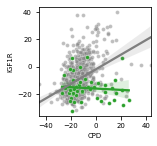

In [15]:
figure( figsize(2,2))
sns.scatterplot( x='CPD', y='IGF1R', data=data[ data.glioma==False], 
            color=sns.color_palette("tab10")[7], s=15, alpha=.5)
sns.scatterplot( x='CPD', y='IGF1R', data=data[ data.glioma==True], 
            color=sns.color_palette("tab10")[2], s=15)
sns.regplot( x='CPD', y='IGF1R', data=data[ data.glioma==True], 
            color=sns.color_palette("tab10")[2], 
            scatter=False)
            #scatter_kws={'s':4, 'alpha':0.5} )
sns.regplot( x='CPD', y='IGF1R', data=data[ data.glioma==False], 
            color=sns.color_palette("tab10")[7],
           scatter=False)
            #scatter_kws={'s':4})
savefig('./Figures/Fig_5_B.pdf')
savefig('./Figures/Fig_5_B.png')
show()

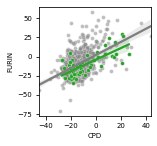

In [16]:
figure( figsize(2,2))
sns.scatterplot( x='CPD', y='FURIN', data=data[ data.glioma==False], 
            color=sns.color_palette("tab10")[7], s=15, alpha=.5)
sns.scatterplot( x='CPD', y='FURIN', data=data[ data.glioma==True], 
            color=sns.color_palette("tab10")[2], s=15)
sns.regplot( x='CPD', y='FURIN', data=data[ data.glioma==True], 
            color=sns.color_palette("tab10")[2], 
            scatter=False)
            #scatter_kws={'s':4, 'alpha':0.5} )
sns.regplot( x='CPD', y='FURIN', data=data[ data.glioma==False], 
            color=sns.color_palette("tab10")[7],
           scatter=False)
            #scatter_kws={'s':4})
savefig('./Figures/Fig_5_C.pdf')
savefig('./Figures/Fig_5_C.png')
show()

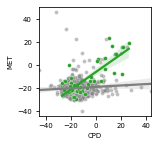

In [17]:
figure( figsize(2,2))
sns.scatterplot( x='CPD', y='MET', data=data[ data.glioma==False], 
            color=sns.color_palette("tab10")[7], s=15, alpha=.5)
sns.scatterplot( x='CPD', y='MET', data=data[ data.glioma==True], 
            color=sns.color_palette("tab10")[2], s=15)
sns.regplot( x='CPD', y='MET', data=data[ data.glioma==True], 
            color=sns.color_palette("tab10")[2], 
            scatter=False)
            #scatter_kws={'s':4, 'alpha':0.5} )
sns.regplot( x='CPD', y='MET', data=data[ data.glioma==False], 
            color=sns.color_palette("tab10")[7],
           scatter=False)
            #scatter_kws={'s':4})
savefig('./Figures/Fig_5_D.pdf')
savefig('./Figures/Fig_5_D.png')
show()

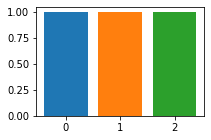

In [11]:
figure( figsize(3,2))
bar( [0], [1], facecolor=sns.color_palette("tab10")[0])
bar( [1], [1], facecolor=sns.color_palette("tab10")[1])
bar( [2], [1], facecolor=sns.color_palette("tab10")[2])
#xticks( [0,1,2], ['LOF','GOF','Tissue/\nTumor'], rotation=45)
#savefig('./Figures/Fig_3_palette.pdf')
#savefig('./Figures/Fig_3_palette.png')
show()

In [17]:
sns.color_palette("tab10")

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]